# Nearest neighbours solution

In [ ]:
import random
import time
import math
import matplotlib.pyplot as plt
import pandas as pd


random.seed(101)

def generate_coordinates(num_cities, x_range=(0, 100), y_range=(0, 100)):
    return [(random.uniform(*x_range), random.uniform(*y_range)) for _ in range(num_cities)]

def compute_distance_matrix(coords):
    num_cities = len(coords)
    matrix = [[0]*num_cities for _ in range(num_cities)]
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            dist = math.dist(coords[i], coords[j])
            matrix[i][j] = matrix[j][i] = dist
    return matrix

def nearest_neighbour_tsp(distance_matrix, start=0):
    num_cities = len(distance_matrix)
    visited = [False] * num_cities
    path = [start]
    total_distance = 0
    current = start
    visited[current] = True

    for _ in range(num_cities - 1):
        nearest = None
        nearest_distance = float('inf')
        for city in range(num_cities):
            if not visited[city] and 0 < distance_matrix[current][city] < nearest_distance:
                nearest = city
                nearest_distance = distance_matrix[current][city]
        path.append(nearest)
        total_distance += nearest_distance
        visited[nearest] = True
        current = nearest

    total_distance += distance_matrix[current][start]
    path.append(start)
    return path, total_distance


trials_per_size = 100
results = []
seed=101

for num_cities in range(10, 101, 1):
    times = []
    lengths = []

    for trial in range(trials_per_size):
        random.seed(seed)
        seed += 1
        coords = generate_coordinates(num_cities)
        distance_matrix = compute_distance_matrix(coords)

        start_time = time.time()
        path, cost = nearest_neighbour_tsp(distance_matrix)
        end_time = time.time()

        new_row = {
        "Number of Cities": num_cities,
        "Total Length": cost,
        "Time (s)": end_time - start_time
        }
        print(new_row)
        results.append(new_row)

        # times.append(end_time - start_time)
        # lengths.append(cost)

    # results.append({
    #     "Number of Cities": num_cities,
    #     "Avg Total Length": sum(lengths) / trials_per_size,
    #     "Avg Time (s)": sum(times) / trials_per_size
    # })


df = pd.DataFrame(results)
df

# plt.figure(figsize=(10, 5))
# # plt.plot(df["Number of Cities"], df["Avg Time (s)"], marker='o')
# plt.plot(df["Number of Cities"], df["Time (s)"])
# plt.title("Average Execution Time vs Number of Cities")
# plt.xlabel("Number of Cities")
# plt.ylabel("Avg Time (seconds)")
# plt.grid(True)
# plt.savefig("nn_tsp_avg_time.png", dpi=100, bbox_inches='tight')


# plt.figure(figsize=(10, 5))
# # plt.plot(df["Number of Cities"], df["Avg Total Length"], marker='o', color='orange')
# plt.plot(df["Number of Cities"], df["Total Length"])
# plt.title("Total lenght vs number of cities")
# plt.xlabel("Number of Cities")
# plt.ylabel("Avg Tour Length")
# plt.grid(True)
# plt.savefig("nn_tsp_avg_length.png", dpi=100, bbox_inches='tight')


{'Number of Cities': 10, 'Total Length': 427.3419300685523, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 246.34708945994703, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 281.0385118091142, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 343.92778072317407, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 277.82773106212636, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 372.3200249037419, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 312.7584591345487, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 298.57420040547737, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 298.655867571033, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 323.93013272345434, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 271.4257164907896, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 285.79482499051835, 'Time (s)': 0.0}
{'Number of Cities': 10, 'Total Length': 327.919997820364, 'Time (s)': 

In [20]:
df.to_csv(r".\output\nn_tsp_results.csv", index=False)

### Visualisations

In [69]:
# plt.figure(figsize=(10, 5))
# # plt.plot(df["Number of Cities"], df["Avg Time (s)"], marker='o')
# plt.scatter(df["Number of Cities"], df["Time (s)"])
# # plt.plot(df["Number of Cities"], df["Time (s)"])
# plt.title("Execution Time vs Number of Cities")
# plt.xlabel("Number of Cities")
# plt.ylabel("Time (seconds)")
# plt.grid(True)
# # plt.savefig("sa_tsp_avg_time.png", dpi=100, bbox_inches='tight')

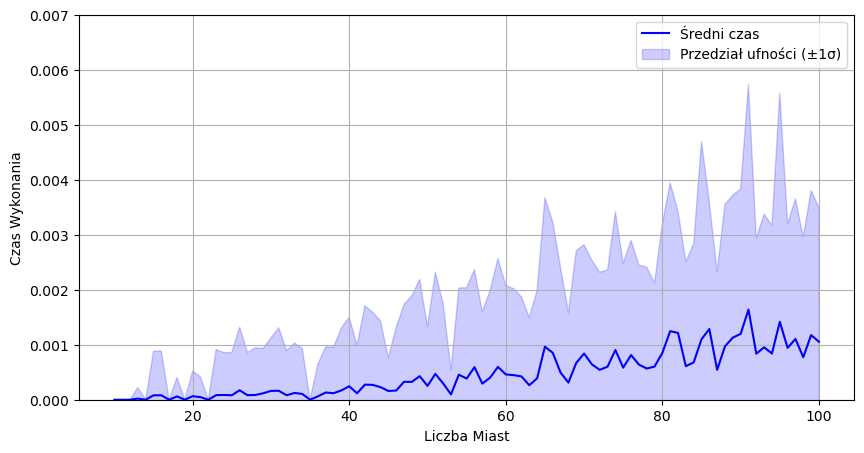

In [68]:
grouped = df.groupby("Number of Cities")["Time (s)"]
mean_time = grouped.mean()
std_time = grouped.std()

# X i Y
x = mean_time.index
y = mean_time.values
yerr = std_time.values

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Średni czas", color='blue')
plt.fill_between(x, y - yerr, y + yerr, color='blue', alpha=0.2, label="Przedział ufności (±1σ)")

# plt.title("Czas Wykonania a Liczba Miast")
plt.xlabel("Liczba Miast")
plt.ylabel("Czas Wykonania")
plt.grid(True)
plt.legend()
# plt.ylim(0, 10)
# plt.savefig(r".\images\nn_tsp_time.png", dpi=100, bbox_inches='tight')
plt.ylim(0, 0.007)
plt.savefig(r".\images\nn_tsp_time_scaled.png", dpi=100, bbox_inches='tight')
plt.show()


In [13]:
# plt.figure(figsize=(10, 5))
# # plt.plot(df["Number of Cities"], df["Avg Total Length"], marker='o', color='orange')
# plt.scatter(df["Number of Cities"], df["Total Length"])
# plt.title("Total lenght vs number of cities")
# plt.xlabel("Number of Cities")
# plt.ylabel("Tour Length")
# plt.grid(True)
# # plt.savefig("sa_tsp_avg_length.png", dpi=100, bbox_inches='tight')

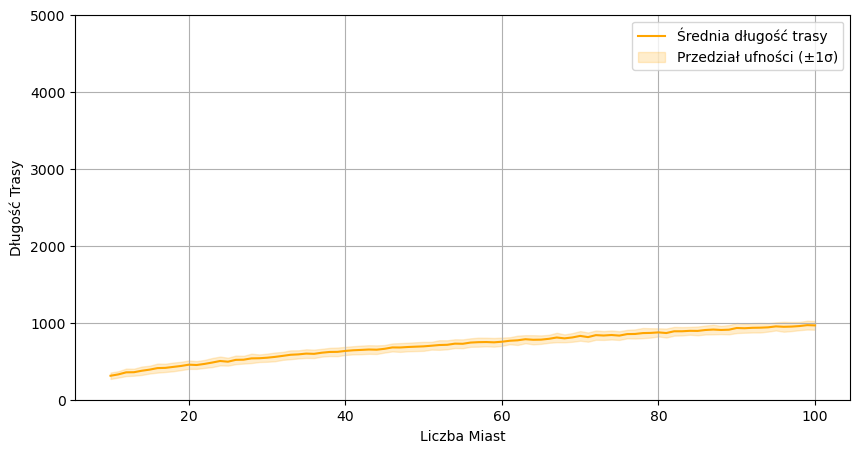

In [38]:
grouped = df.groupby("Number of Cities")["Total Length"]
mean_length = grouped.mean()
std_length = grouped.std()

# X i Y
x = mean_length.index
y = mean_length.values
yerr = std_length.values

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Średnia długość trasy", color='orange')
plt.fill_between(x, y - yerr, y + yerr, color='orange', alpha=0.2, label="Przedział ufności (±1σ)")

# plt.title("Całkowita Długość Trasy a Liczba Miast")
plt.xlabel("Liczba Miast")
plt.ylabel("Długość Trasy")
plt.grid(True)
plt.legend()
plt.ylim(0, 5000)
plt.savefig(r".\images\nn_tsp_length.png", dpi=100, bbox_inches='tight')
plt.show()


In [35]:
def plot_tsp(coords, path, filename=None):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]

    plt.figure(figsize=(8, 6))
    

    plt.plot(x, y, 'o-', label='Nearest Neighbour Path', color='blue')


    for i, (xi, yi) in enumerate(coords):
        plt.scatter(xi, yi, color='black', zorder=3)
        plt.text(xi + 0.5, yi + 0.5, str(i), fontsize=9)

    start_idx = path[0]
    plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)

    plt.title("TSP - Nearest Neighbour Solution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)


    if filename:
        plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.show()

Path: [0, 18, 11, 10, 3, 6, 22, 21, 15, 8, 9, 4, 16, 2, 13, 24, 14, 1, 5, 12, 7, 19, 23, 20, 17, 0]
Total cost: 518.3142478230502
Time taken: 0.000000 seconds


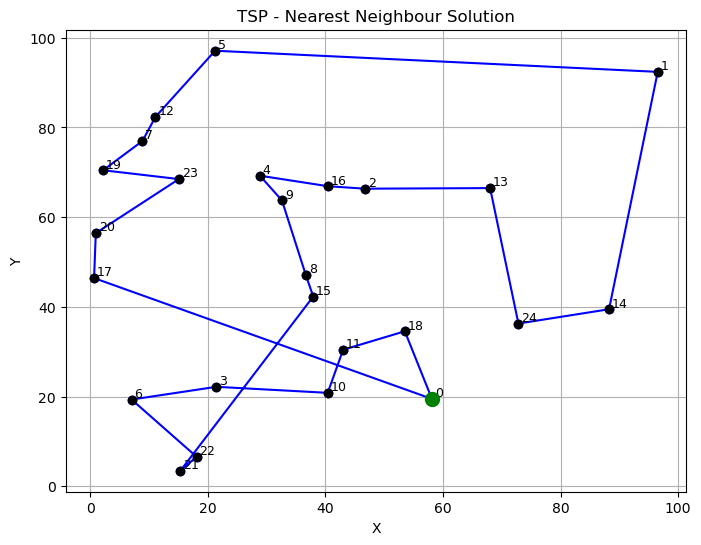

In [66]:
num_cities = 25
# num_cities = 20
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path, cost = nearest_neighbour_tsp(distance_matrix)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, filename=r".\images\25_NN.png")

Path: [0, 18, 11, 10, 45, 3, 35, 6, 29, 21, 22, 40, 42, 15, 8, 9, 4, 16, 2, 41, 13, 28, 33, 36, 34, 31, 39, 1, 26, 27, 43, 5, 46, 44, 12, 7, 19, 48, 23, 20, 17, 30, 25, 24, 14, 37, 47, 38, 32, 49, 0]
Total cost: 641.7840701162241
Time taken: 0.000000 seconds


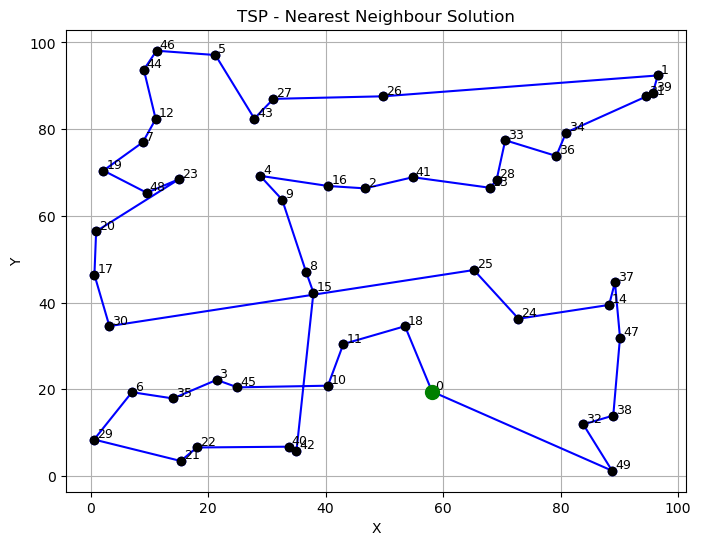

In [65]:
num_cities = 50
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path, cost = nearest_neighbour_tsp(distance_matrix)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, filename=r".\images\50_NN.png")